# Handwritten Digit Classification using Ensemble Methods


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC


## Load the MNIST Dataset

In [6]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype('int')

print("Dataset shape:", X.shape)

Dataset shape: (70000, 784)


## Preprocess the Data

### Drop Irrelevant Columns & Handle Missing Values

In [ ]:

# Check for missing values
print(X.isnull().sum().sum())

X = X.dropna()


print("Data shape after cleaning:", X.shape)


0
Data shape after cleaning: (70000, 784)


In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Visualize the Data

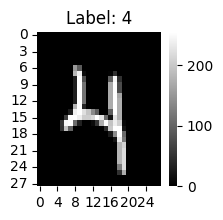

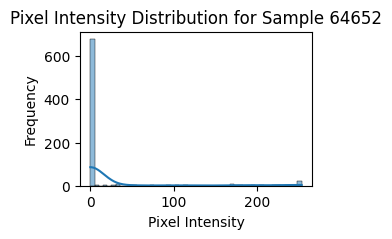

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sample_index = np.random.randint(0, X.shape[0])
sample_image = X.iloc[sample_index].values.reshape(28,28)

plt.figure(figsize=(2,2))
sns.heatmap(sample_image, cmap='gray')
plt.title(f"Label: {y.iloc[sample_index]}")
plt.show()

# Plot pixel intensity distribution
plt.figure(figsize=(3,2))
sns.histplot(X.iloc[sample_index], bins=50, kde=True)
plt.title(f"Pixel Intensity Distribution for Sample {sample_index}")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


## Train Base Models


In [ ]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=10,max_depth=4,min_samples_leaf=3,max_leaf_nodes=8, random_state=42)#default krai
knn = model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='auto',
    
)
lr = LogisticRegression(max_iter=200, random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, max_leaf_nodes=8, min_samples_leaf=3,
                       min_samples_split=10, random_state=42)

In [9]:
knn.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [10]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

# Ensemble Methods

## Bagging Classifier (Bagged Decision Trees)

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42,
    n_jobs=4  # Adjust this value based on your system's resources CPU CORES
)

bagging_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, n_jobs=4,
                  random_state=42)

## Boosting Classifier (XGBoost)

In [ ]:

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbosity=0
)

xgb_clf.fit(X_train, y_train)



Note: you may need to restart the kernel to use updated packages.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

## Stacking Classifier

In [13]:
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('knn', knn), ('lr', lr)],
    final_estimator=SVC()
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=4,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=3,
                                                       min_samples_split=10,
                                                       random_state=42)),
                               ('knn',
                                KNeighborsClassifier(weights='distance')),
                               ('lr',
                                LogisticRegression(max_iter=200,
                                                   random_state=42))],
                   final_estimator=SVC())

## Evaluate Models

In [26]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Evaluate Bagging Classifier



Bagging Classifier Accuracy: 0.9557
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.93      0.95      0.94      1380
           3       0.96      0.93      0.95      1433
           4       0.94      0.95      0.95      1295
           5       0.94      0.95      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.97      0.96      0.96      1503
           8       0.94      0.94      0.94      1357
           9       0.94      0.93      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



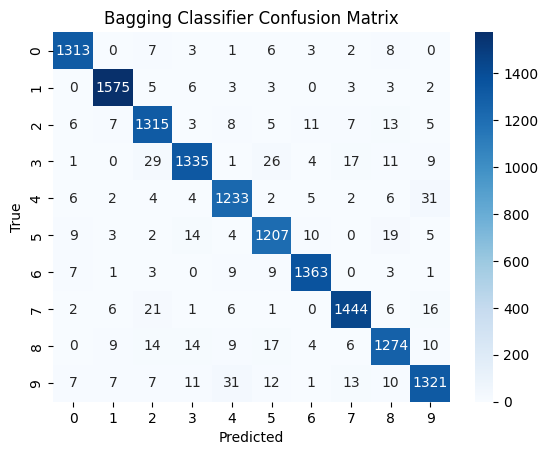

In [27]:

evaluate_model(bagging_clf, "Bagging Classifier")


## Evaluate XGBoost Classifier



XGBoost Classifier Accuracy: 0.9622
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.95      0.94      0.95      1433
           4       0.95      0.96      0.96      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.94      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



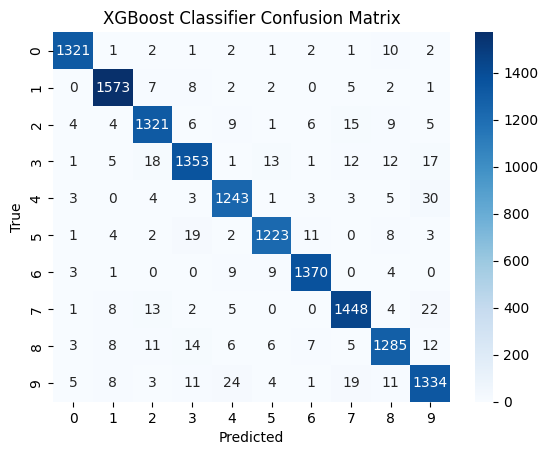

In [28]:
evaluate_model(xgb_clf, "XGBoost Classifier")

## Evaluate Stacking Classifier



Stacking Classifier Accuracy: 0.9763
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.98      0.98      0.98      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.99      0.99      0.99      1396
           7       0.97      0.98      0.98      1503
           8       0.98      0.96      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



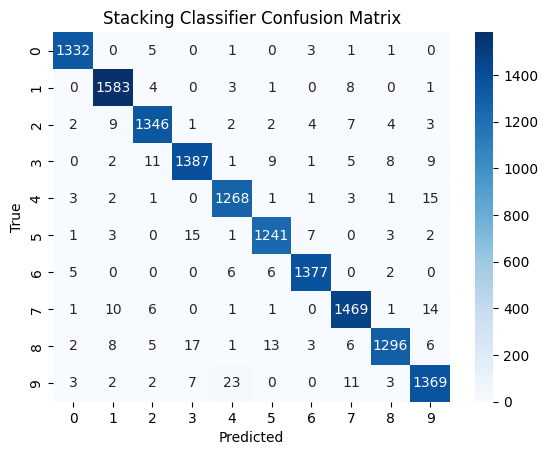

In [29]:
evaluate_model(stacking_clf, "Stacking Classifier")


## Comparison Plots and Confusion Matrices

In [4]:
import joblib

# Load the saved Stacking Classifier
stacking_clf = joblib.load('stacking_classifier.pkl')
xgb_clf = joblib.load(r'D:\Documents\AML\code\xgboost_classifier.pkl')
bagging_clf = joblib.load('bagging_classifier.pkl')

Stacking Classifier Accuracy: 0.9763
Bagging Classifier Accuracy: 0.9557
XGBoost Classifier Accuracy: 0.9622


C:\Users\user\AppData\Local\Temp\ipykernel_11424\749562113.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_scores, palette="viridis")


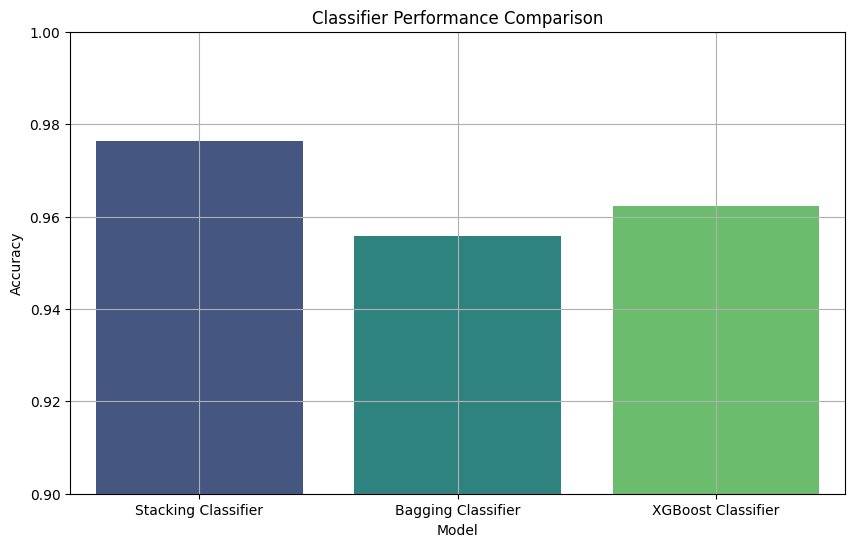

In [ ]:

models = {
    "Stacking Classifier": stacking_clf,
    "Bagging Classifier": bagging_clf,
    "XGBoost Classifier": xgb_clf
}

model_names = []
model_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    model_names.append(name)
    model_scores.append(acc)
    print(f"{name} Accuracy: {acc:.4f}")

plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=model_scores, palette="viridis")
plt.title("Classifier Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.00)  # Adjust based on your results
plt.grid(True)
plt.show()


## Save Models


In [30]:
import joblib
joblib.dump(bagging_clf, 'bagging_classifier.pkl')
joblib.dump(stacking_clf, 'stacking_classifier.pkl')
joblib.dump(xgb_clf, 'xgboost_classifier.pkl')


['xgboost_classifier.pkl']